<a href="https://colab.research.google.com/github/CodeHunterOfficial/CCPiOIIC/blob/main/ML/%D0%90%D1%80%D0%B0%D0%B1%D0%BE%D0%B2_%D0%9C%D0%9A_%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обучение нейронной сети

Это последняя и самая важная практика в этом блоке. В ней вы соберете воедино все, что мы с вами изучили и примените для создания сети, которая классифицирует рукописные цифры.

Задание будет состоять из следующих этапов:
1.  Реализация слоя ReLU
2.  Реализация полносвязного слоя
3.  Написание обучающего цикла
4.  Загрузка данных и обучение сети


**Задание 1**
Написание слоя ReLU. В этом задании вы реализуете слой нейронной сети, который вычисляет поэлементно функцию ReLU:

$$
ReLU(x) = max(0, x)
$$

и выгядит следующим образом:

![alt text](https://miro.medium.com/max/536/1*oePAhrm74RNnNEolprmTaQ.png)

Нетрудно заметить, что производная при $x > 0$ равна $1$, а при $x < 0$ равна $0$. Это вам пригодится при реализации backward pass

##Немного теории.

Рассмотрим математическое объяснение работы слоя **ReLU** (Rectified Linear Unit) и его производной.


### 1. **Функция ReLU**

Функция ReLU определяется следующим образом:

$$
\text{ReLU}(x) = \max(0, x)
$$

График функции ReLU выглядит так:

- Для $x > 0$: $\text{ReLU}(x) = x$ (линейная часть).
- Для $x \leq 0$: $\text{ReLU}(x) = 0$ (нулевая часть).



### 2. **Производная ReLU**

Производная функции ReLU вычисляется как:

$$
\frac{d}{dx} \text{ReLU}(x) =
\begin{cases}
1, & \text{если } x > 0 \\
0, & \text{если } x \leq 0
\end{cases}
$$

#### Почему так?
- Для $x > 0$: $\text{ReLU}(x) = x$, поэтому производная равна $1$.
- Для $x \leq 0$: $\text{ReLU}(x) = 0$, поэтому производная равна $0$.



### 3. **Forward Pass (Прямой проход)**

На вход слоя ReLU подается тензор $x$. Выход слоя вычисляется как:

$$
z = \text{ReLU}(x)
$$

Где:
- $z$ — выход слоя ReLU.
- $x$ — входные данные.



### 4. **Backward Pass (Обратный проход)**

В обратном проходе нам нужно вычислить градиент функции потерь $L$ по входу $x$, то есть $\frac{dL}{dx}$. Это делается с помощью **chain rule** (правила цепочки):

$$
\frac{dL}{dx} = \frac{dL}{dz} \cdot \frac{dz}{dx}
$$

Где:
- $\frac{dL}{dz}$ — градиент функции потерь по выходу слоя ReLU (это входной градиент для backward pass).
- $\frac{dz}{dx}$ — производная ReLU по входу $x$.

Из определения производной ReLU:

$$
\frac{dz}{dx} =
\begin{cases}
1, & \text{если } x > 0 \\
0, & \text{если } x \leq 0
\end{cases}
$$

Таким образом, градиент $\frac{dL}{dx}$ вычисляется как:

$$
\frac{dL}{dx} =
\begin{cases}
\frac{dL}{dz}, & \text{если } x > 0 \\
0, & \text{если } x \leq 0
\end{cases}
$$



### 5. **Реализация**

#### Forward Pass:
$$
z = \max(0, x)
$$

#### Backward Pass:
$$
\frac{dL}{dx} = \frac{dL}{dz} \cdot \frac{dz}{dx}
$$

Где:
$$
\frac{dz}{dx} =
\begin{cases}
1, & \text{если } x > 0 \\
0, & \text{если } x \leq 0
\end{cases}
$$



### 6. **Пример**

Пусть на вход слоя ReLU подается вектор:

$$
x = \begin{bmatrix} 2 & -1 & 0 & 3 \end{bmatrix}
$$

#### Forward Pass:
$$
z = \text{ReLU}(x) = \begin{bmatrix} 2 & 0 & 0 & 3 \end{bmatrix}
$$

#### Backward Pass:
Пусть $\frac{dL}{dz} = \begin{bmatrix} 0.5 & -0.2 & 0.1 & 0.3 \end{bmatrix}$.

Тогда:

$$
\frac{dz}{dx} = \begin{bmatrix} 1 & 0 & 0 & 1 \end{bmatrix}
$$

И градиент $\frac{dL}{dx}$:

$$
\frac{dL}{dx} = \frac{dL}{dz} \cdot \frac{dz}{dx} = \begin{bmatrix} 0.5 & 0 & 0 & 0.3 \end{bmatrix}
$$



### 7. **Итог**

- **Forward Pass**: Применяем функцию ReLU к входным данным.
- **Backward Pass**: Умножаем входной градиент $\frac{dL}{dz}$ на производную ReLU $\frac{dz}{dx}$, которая равна $1$ для положительных значений и $0$ для неположительных.

Этот подход позволяет эффективно распространять градиенты через слой ReLU в процессе обучения нейронной сети.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from typing import List
from tqdm import tqdm_notebook as tqdm
from IPython.display import clear_output

In [7]:
from abc import ABC, abstractmethod
import numpy as np

class Layer(ABC):
    """
    Абстрактный базовый класс слоя нашей нейронной сети.
    Все слои должны наследоваться от него и реализовывать два метода: forward и backward
    """

    @abstractmethod
    def forward(self, x):
        """
        Абстрактный метод для прямого прохода.
        Должен быть реализован в дочерних классах.
        """
        pass

    @abstractmethod
    def backward(self, dL_dz, learning_rate=0):
        """
        Абстрактный метод для обратного прохода.
        Должен быть реализован в дочерних классах.
        """
        pass

class ReLU(Layer):
    """
    Слой ReLU
    """
    def forward(self, x):
        """
        Метод, который вычисляет ReLU(x)

        Размер выхода должен совпадать со входом

        """
        self._saved_input = x  # сохраняем вход
        output = np.maximum(0, x)  # применяем функцию ReLU
        assert output.shape == x.shape
        return output

    def backward(self, dL_dz, learning_rate=0.):
        """
        dL_dz -- производная финальной функции по выходу этого слоя.
                 Размерость должна в точности соответствовать размерности
                 x, который прошел в forward pass.
        learning_rate -- не используется, т.к. ReLU не содержит параметров.

        Метод должен посчитать производную dL_dx.
        Благодаря chain rule, мы знаем, что dL_dx = dL_dz * dz_dx
        и при этом dL_dz нам известна.

        Для слоя relu, dz_dx(x) = 1, при x > 0, и dz_dz = 0 при x < 0

        * сохраненный инпут находится в self._saved_input
        """
        dz_dx = np.where(self._saved_input > 0, 1, 0)  # производная ReLU
        assert dz_dx.shape == self._saved_input.shape, f"Shapes must be the same. Got {dz_dx.shape, self._saved_input.shape}"
        output = dz_dx * dL_dz  # применяем chain rule
        return output

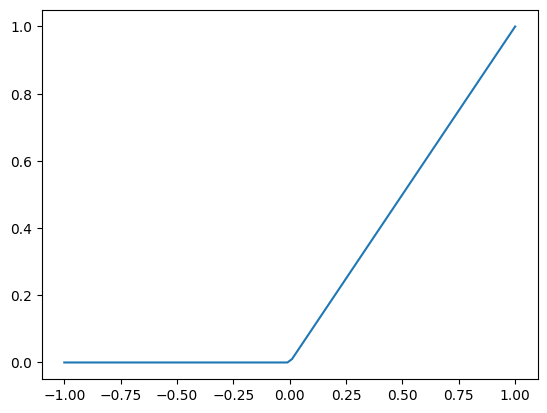

In [8]:
relu = ReLU()

# убедитесь, что график соответствует представленному вверху
plt.plot(np.linspace(-1, 1, 100), relu.forward(np.linspace(-1, 1, 100)))

In [9]:
f = lambda x: ReLU().forward(x)

x = np.linspace(-1, 1, 10*32).reshape([10, 32])
l = ReLU()
l.forward(x)
grads = l.backward(np.ones([10, 32]))
numeric_grads = derivative(f, x, dx=1e-6)
assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0),\
     "gradient returned by your layer does not match the numerically computed gradient"
print("Test passed")

Test passed


<ipython-input-9-3a18a67450ec>:7: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  numeric_grads = derivative(f, x, dx=1e-6)


**Задание 2** Реализация полносвязного слоя.

Закончите реализацию метода forward для полносвязного слоя

In [10]:
import numpy as np

class FCLayer(Layer):
    """
    Полносвязный (fully connected/dense) слой
    """
    def __init__(self, in_dim, out_dim):
        """
        in_dim, out_dim -- количество входных и выходных нейронов соответственно
        """
        self.in_dim = in_dim
        self.out_dim = out_dim
        # инициализируем матрицу весов (in_dim,out_dim) нормальным распределением
        self.weights = np.random.randn(in_dim, out_dim) * 0.001

        # инициализируем смещение нулями
        self.bias = np.zeros(self.out_dim)
        self._saved_input = None

    def forward(self, x: np.ndarray) -> np.ndarray:
        """
        Вычисление выхода полносвязного слоя.

        x -- вход слоя, размерности (N, in_dim), где N -- количество объектов
             в батче

        return: matmul(x, weights) + bias
        """
        assert np.ndim(x) == 2
        assert x.shape[1] == self.in_dim
        self._saved_input = x

        # < YOUR CODE STARTS HERE >
        # переменная output должна содержать выход полносвязного слоя
        output = np.dot(x, self.weights) + self.bias
        # < YOUR CODE ENDS HERE >

        assert output.shape == (x.shape[0], self.out_dim), (output.shape, (x.shape[0], self.out_dim))
        return output

    def backward(self, dL_dz, learning_rate=0.):
        """
        dL_dz -- производная финальной функции по выходу этого слоя.
                 Размерость (N, self.out_dim).
        learning_rate -- если отличен от нуля, то с вызовом этой функции, параметры
                         слоя (weights, bias) будут обновлены

        Метод должен посчитать производную dL_dx.

        """
        assert np.ndim(dL_dz) == 2
        assert dL_dz.shape[1] == self.out_dim

        # очень рекомендуем понять почему это так,
        # хорошее объяснение здесь: http://cs231n.stanford.edu/handouts/linear-backprop.pdf
        self.dL_dw = np.dot(self._saved_input.T, dL_dz)
        self.dL_dx = np.dot(dL_dz, self.weights.T)
        self.dL_db = dL_dz.sum(0)

        assert self.dL_db.shape == self.bias.shape
        assert self.dL_dw.shape == self.weights.shape
        assert self.dL_dx.shape == self._saved_input.shape

        if learning_rate != 0:
            # знакомый вам шаг градиентного спуска!
            self.weights -= learning_rate * self.dL_dw
            self.bias -= learning_rate * self.dL_db

        return self.dL_dx

Теперь перейдем к вычислению лосса. Т.к. перед нами стоит задача мультиклассовой классификации, то мы будем использовать multiclass_cross_entropy_loss, который мы рассмотрели на лекции.
Такой лосс на одном объекте $i$, который принадлежит к классу $k$ будет равен:
$$
loss_i = -log(p_i^k),
$$
где $p_i^k$ -- предсказанная вероятность того, что $i$ый объект принадлежит к классу $k$.

Для того, чтобы получить вероятности, мы использовали Softmax, примененный в логитам выходного слоя. Т.е.
$$
p_i^k = \frac{exp(logit_k)}{\sum_{j=0}^{m} exp(logit_j)}
$$

А значит лосс можно переписать так:
$$
loss_i = -log(p_i^k) = -logit_k + log(\sum_{j=0}^{m} exp(logit_j))
$$

Как мы помним, сеть изначально предсказывает логиты, и затем мы превращаем их в вероятности. Но т.к. мы знаем, что нам предстоит считать лосс, то мы можем не тратить "силы" на вычисление вероятностей и посчитать лосс основываясь на логитах. Такая запись проще и вычислительно более стабильная.

Ниже мы приводим готовую реализацию лосса и его градиента.

In [11]:
def multiclass_crossentropy_with_logits(logits, y_true):
    """
    logits -- выход нейронной сети без активации. Размерность: (N, k),
              где N -- количество объектов, k -- количество классов
    y_true -- реальные классы для N объектов

    Класс возвращает вектор из лоссов на каждом объекте

    """

    logits_for_answers = logits[np.arange(len(logits)), y_true]

    cross_entropy = -logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))

    return cross_entropy

def grad_multiclass_crossentropy_with_logits(logits, y_true):
    """
     logits -- выход нейронной сети без активации. Размерность: (N, k),
              где N -- количество объектов, k -- количество классов
    y_true -- реальные классы для N объектов

    Класс возвращает матрицу производных.

    """
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)), y_true] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    return (- ones_for_answers + softmax) / logits.shape[0]

**Задание 3** Реализация класса  Network.

В этом задании вам предлагается реализовать методы forward(), predict(), train_step(). Это последний шаг перед тем как наша сеть будет готова!

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from typing import List
from sklearn.metrics import accuracy_score
from IPython.display import clear_output

class Network:
    """
    Нейронная сеть
    """
    def __init__(self, layers: List[Layer]):
        """
        Для инициализации нейронной сети, нам нужен список слоев, которые должны
        быть последовательно применены друг к другу.
        """
        self.layers = layers

    def forward(self, x: np.ndarray):
        """
        x -- входной батч объектов размера (N, размер_входа_первого_слоя)

        Получив x на вход, сеть должна по-очереди применить к нему все слои.
        Т.е. выход каждого слоя является входом следующего.

        x -> layer_0 -> layer_1 ... -> last_layer
        """
        output = x
        for layer in self.layers:
            output = layer.forward(output)
        return output

    def predict(self, x):
        """
        x -- входной батч объектов размера (N, размер_входа_первого_слоя)

        Функция должна вернуть вектор размера (N) с номером предсказанного класса
        для каждого объекта.
        """
        logits = self.forward(x)  # считаем логиты, сделав полный форвард пасс сети
        classes = np.argmax(logits, axis=1)  # находим индекс максимального значения для каждого объекта
        assert classes.shape == (x.shape[0],)
        return classes

    def train_step(self, x, y, learning_rate):
        """
        x -- входной батч объектов размера (N, размер_входа_первого_слоя)
        y -- реальные классы объектов (N,)
        """
        logits = self.forward(x)
        loss = multiclass_crossentropy_with_logits(logits, y)
        loss_grad = grad_multiclass_crossentropy_with_logits(logits, y)

        # Пробрасываем градиент через все слои в обратном порядке
        for layer in reversed(self.layers):
            loss_grad = layer.backward(loss_grad, learning_rate)

        return np.mean(loss)

    def fit(self, x_train, y_train, x_test, y_test, learning_rate, num_epochs, batch_size):
        """
        Цикл обучения уже реализован. Основная его задача -- итерироваться по
        минибатчам и вызывать на каждом из них train_step, который вы уже реализовали.

        В остальном -- это логирование лосса, точности и отрисовка графика.
        """
        train_log = []
        test_log = []
        loss_log = []

        for epoch in range(num_epochs):
            loss_iters = []
            for x_batch, y_batch in iterate_minibatches(x_train, y_train, batchsize=batch_size, shuffle=True):
                loss_iters.append(self.train_step(x_batch, y_batch, learning_rate=learning_rate))

            loss_log.append(np.mean(loss_iters))  # для визуализации усредняем лосс за каждую итерацию
            train_accuracy = accuracy_score(y_train, self.predict(x_train))
            test_accuracy = accuracy_score(y_test, self.predict(x_test))
            train_log.append(train_accuracy)
            test_log.append(test_accuracy)

            clear_output()
            print("Epoch", epoch)
            print("Train accuracy:", train_log[-1])
            print("Test accuracy:", test_log[-1])
            plt.figure(figsize=(10, 5))
            ax1 = plt.subplot(1, 2, 1)
            plt.plot(train_log, label='train accuracy')
            plt.plot(test_log, label='test accuracy')
            ax2 = plt.subplot(1, 2, 2)
            plt.plot(loss_log, label='loss')
            ax1.legend(loc='best')
            ax2.legend(loc='best')
            plt.grid()
            plt.tight_layout()
            plt.show()

def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in tqdm(range(0, len(inputs) - batchsize + 1, batchsize)):
        if shuffle:
            batch_indexes = indices[start_idx:start_idx + batchsize]
        else:
            batch_indexes = slice(start_idx, start_idx + batchsize)

        yield inputs[batch_indexes], targets[batch_indexes]

## Обучение
На этом этапе наша сеть полностью описаны и готова к бою. Нам нужны теперь только данные.

Мы поставим перед собой задачу классифицировать изображения рукописных цифр. Они представляют собой картинки размера (28, 28). Для использования нашей сети мы превратим их в строчки длины $28*28 = 784$.

Давайте посмотрим как они выглядят:

In [13]:
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784) (10000, 784)


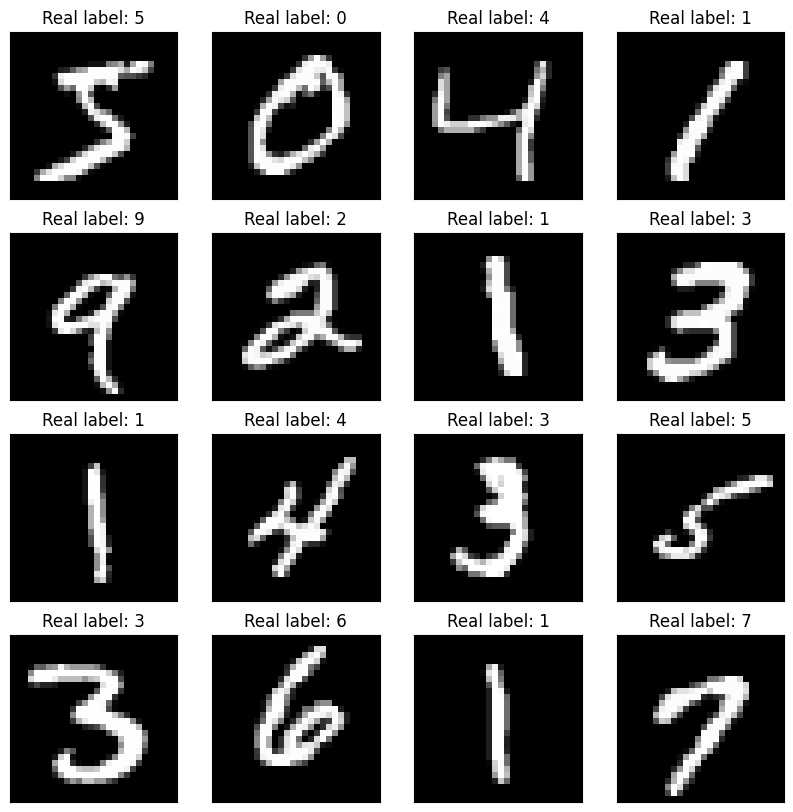

In [14]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

show_mnist(train_images, train_labels)

# преобразуем изображения к нужному виду
train_images = train_images.reshape(train_images.shape[0], -1).astype('float32') / 255.
test_images = test_images.reshape(test_images.shape[0], -1).astype('float32') / 255.
print(train_images.shape, test_images.shape)

Epoch 9
Train accuracy: 0.9894833333333334
Test accuracy: 0.974


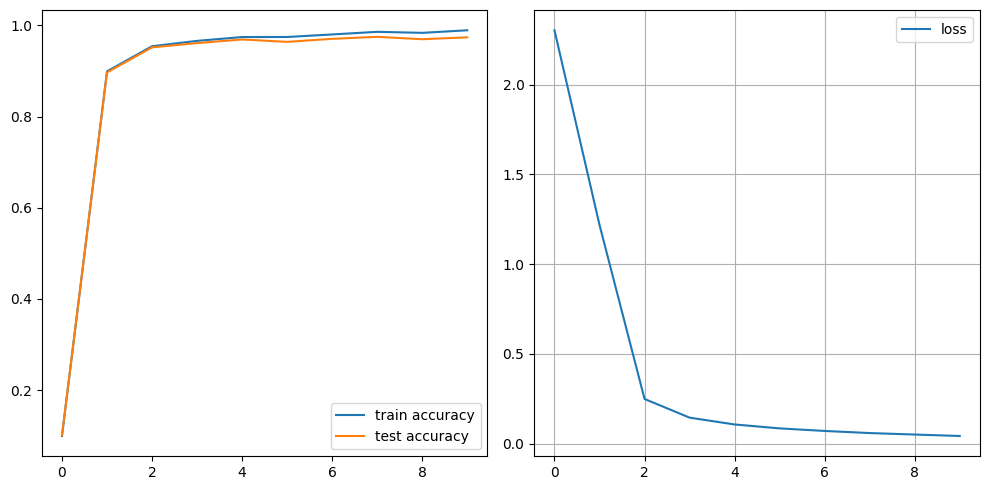

In [15]:
# Наша сеть будет состоять из одного скрытого слоя
layers = []
layers.append(FCLayer(train_images.shape[1], 100)) # входной слой
layers.append(ReLU()) # активация
layers.append(FCLayer(100, 200)) # скрытый слой
layers.append(ReLU()) # активация
layers.append(FCLayer(200, 10)) # выходной слой -- 10 классов (10 цифр). Обратите внимание, мы не используем активацию!
                                # т.к. лосс рассчитывает на логиты, а не вероятности

# инициализируем наш класс указанными слоями
net = Network(layers=layers)
# если все реализовано правильно -- точность на отложенной части выборки достигнет 97%
net.fit(x_train=train_images, y_train=train_labels,
        x_test=test_images, y_test=test_labels,
        batch_size=32, num_epochs=10, learning_rate=0.1)

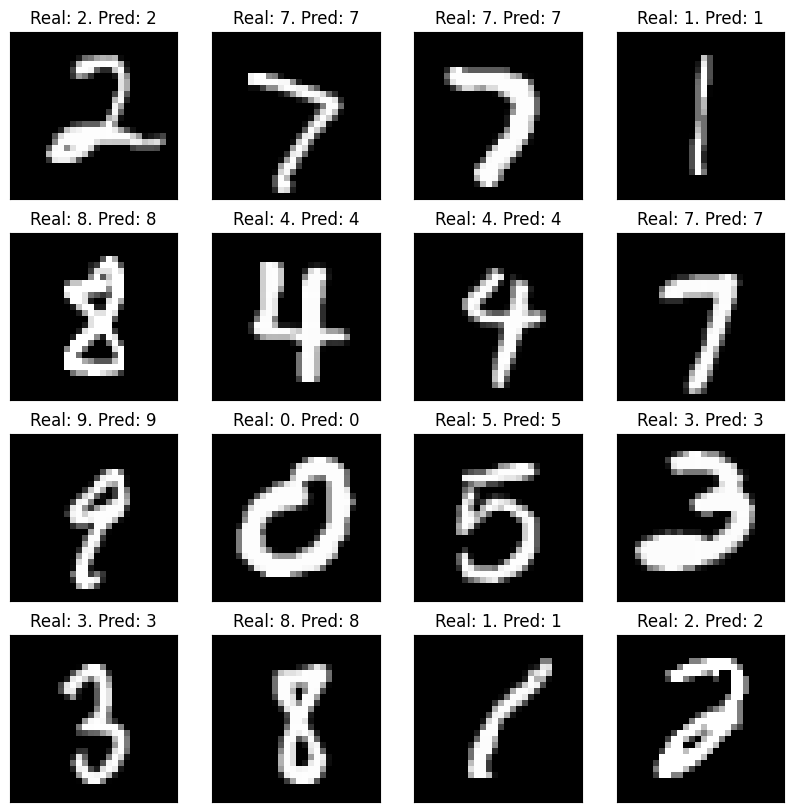

In [16]:
predicted_labels = net.predict(test_images)
idxs = np.random.choice(np.arange(len(test_images)), 16, replace=False)
show_mnist(test_images[idxs].reshape((-1, 28, 28)), test_labels[idxs], predicted_labels[idxs])